<h1 style='text-align: center;'>Homework 3</h1>

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

import requests
from bs4 import BeautifulSoup as Soup
import time

from textblob import TextBlob, Word
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet

### Part 1

1) Construct a function, which will ask the user to input several numbers separated by commas and
will calculate their average. (e.g. if the user inputs 3,5,7 the function must result in 5)

In [15]:
def count_avg():
    """Function counts the average of given numbers"""
    
    nums = str(input("Input comma separated numbers, when you are done press 'Enter': ")).split(',')
    nums = [int(num) for num in nums]
    avg = sum(nums)/len(nums)
    
    return avg

count_avg()

Input comma separated numbers, when you are done press 'Enter'7, 8, 9, 5,4,7,9


7.0

2) Upgrade the function above to also ask the user the number of occurrences to calculate the
average for. (e.g. if the user inputs 1,3,5,7,9 and as the second argument to function inputs 2, the
function must result in (7+9)/2 = 8. If the user inputs the same numbers as a first argument, but
inputs 3 as the 2nd, then the function must result in (5+7+9)/3=7)

In [20]:
def count_avg_occur():
    """Function counts the average of given numbers and occurrences"""
    
    nums = str(input("Input comma separated numbers, when you are done press 'Enter': ")).split(',')
    occur = int(input("Number of occurences: "))
    nums = [int(num) for num in nums]
    avg = sum(nums[-occur:])/occur
    
    return avg

count_avg_occur()

Input comma separated numbers, when you are done press 'Enter': 1,3,5,7,9
Number of occurences: 3


7.0

3) Construct a function, which will generate a random number between 1 and 100 (both
included). If this number is between 50 and 100 (not included) the function returns "Win", if it is
between 1 and 50 (both included) the function returns "Loss" and if it is exactly 100 then the
function returns "Draw". (Hint: to generate a random number, one should first import a package
called random (i.e. import random) and then use the function randint from there
(e.g. random.randint(x,y), where x=1 and y=100 in our case)

In [29]:
#import random

def num_game():
    num = random.randint(1, 100)
    string = ''
    if num > 50 and num < 100:
        string = "Win"
    elif num == 100:
        string = "Draw"
    else:
        string = "Loss"
    return string

num_game()

'Loss'

4) Create a list of 3 stocks (choose whatever stocks you want, e.g. ["IBM","AAPL","MSFT"]).
Create a for loop that will iterate over the list, get the data of relevant stock (from Quandl, WIKI
database) and print the first 7 rows of the data.

In [30]:
#import quandl

stock_list = ["IBM","AAPL","MSFT"]

for stock in stock_list:
        data = quandl.get('WIKI/' + stock)
        print(data[:7])

             Open   High    Low   Close   Volume  Ex-Dividend  Split Ratio  \
Date                                                                         
1962-01-02  578.5  578.5  572.0  572.00  19360.0          0.0          1.0   
1962-01-03  572.0  577.0  572.0  577.00  14400.0          0.0          1.0   
1962-01-04  577.0  577.0  571.0  571.25  12800.0          0.0          1.0   
1962-01-05  570.5  570.5  559.0  560.00  18160.0          0.0          1.0   
1962-01-08  559.5  559.5  545.0  549.50  27200.0          0.0          1.0   
1962-01-09  552.0  563.0  552.0  556.00  24560.0          0.0          1.0   
1962-01-10  557.0  559.5  557.0  557.00  14960.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
1962-01-02  15.270839  15.270839  15.099257   15.099257     387200.0  
1962-01-03  15.099257  15.231243  15.099257   15.231243     288000.0  
1962-01-04  1

5) Upgrade the for loop above. Now, instead of printing the data, the for loop should iterate
over the list, get the data and plot it.

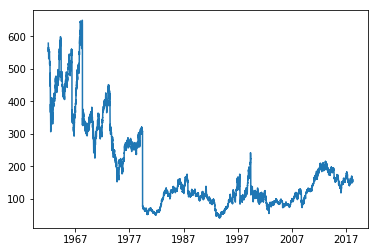

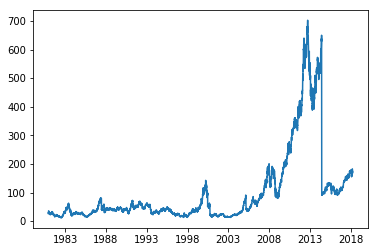

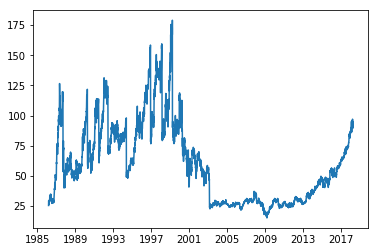

In [31]:
def create_list(*stocks):
    stock_list = []
    
    for stock in stocks:
        data = quandl.get('WIKI/' + stock)
        plt.plot(data['Open'])
        plt.show()
        stock_list.append(data)
    
    return stock_list

data = create_list("IBM","AAPL","MSFT")


Anything additional (plot coloring, customization etc.) is highly welcomed.

In [33]:
IBM = data[0]
IBM.head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,578.5,578.50,572.0,572.00,19360.0,0.0,1.0,15.270839,15.270839,15.099257,15.099257,387200.0
1962-01-03,572.0,577.00,572.0,577.00,14400.0,0.0,1.0,15.099257,15.231243,15.099257,15.231243,288000.0
1962-01-04,577.0,577.00,571.0,571.25,12800.0,0.0,1.0,15.231243,15.231243,15.072860,15.079459,256000.0
1962-01-05,570.5,570.50,559.0,560.00,18160.0,0.0,1.0,15.059661,15.059661,14.756092,14.782489,363200.0
1962-01-08,559.5,559.50,545.0,549.50,27200.0,0.0,1.0,14.769291,14.769291,14.386530,14.505318,544000.0
1962-01-09,552.0,563.00,552.0,556.00,24560.0,0.0,1.0,14.571311,14.861681,14.571311,14.676900,491200.0
1962-01-10,557.0,559.50,557.0,557.00,14960.0,0.0,1.0,14.703297,14.769291,14.703297,14.703297,299200.0
1962-01-11,558.5,563.00,558.5,563.00,15760.0,0.0,1.0,14.742893,14.861681,14.742893,14.861681,315200.0
1962-01-12,564.0,568.00,564.0,564.00,21760.0,0.0,1.0,14.888079,14.993668,14.888079,14.888079,435200.0


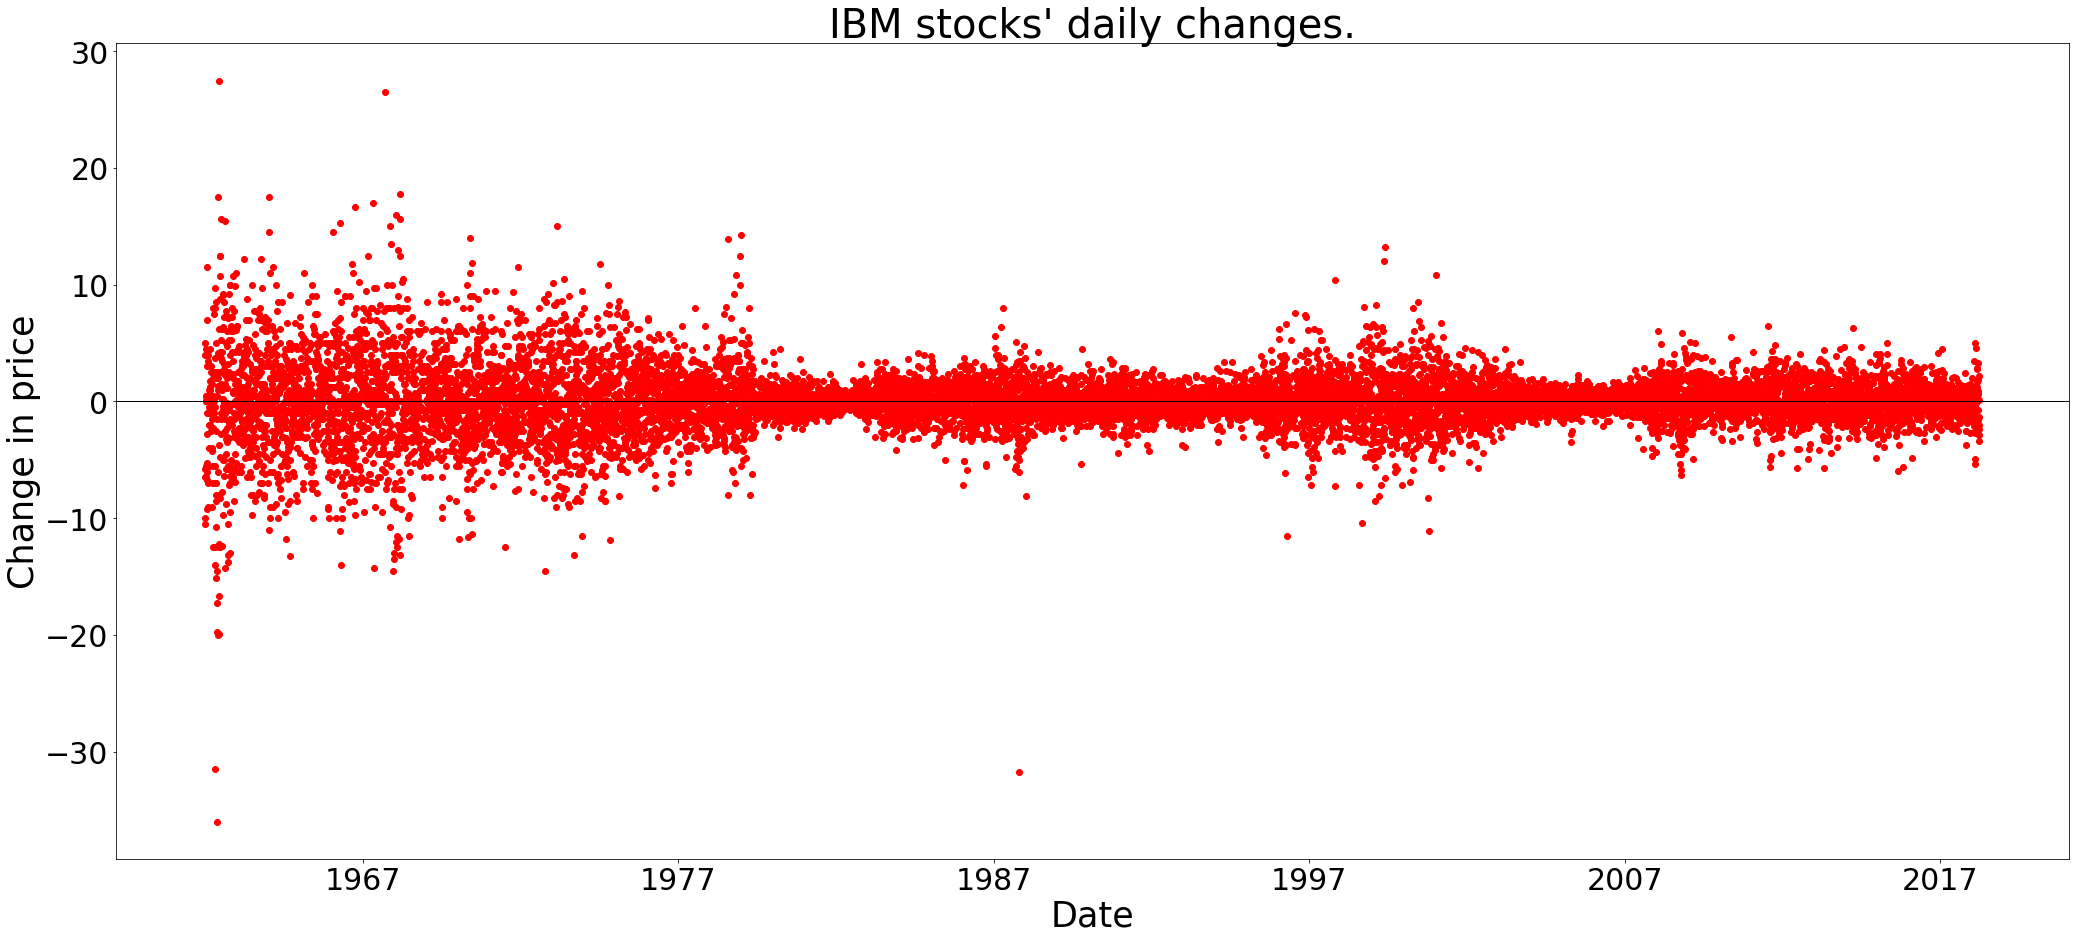

In [34]:
plt.figure(figsize=(35,15))
plt.scatter(IBM.index, IBM['Close'] - IBM['Open'], color='red')
plt.title("IBM stocks' daily changes.", size=40)
plt.xlabel("Date", size=35)
plt.xticks(size=30)
plt.ylabel("Change in price", size=35)
plt.yticks(size=30)
plt.axhline(0, color='black', lw=1)

### Part 2

book.toscrape.com is an	artificial book	selling	website. Your task is to scrape 
Descriptions of	all books, calculate the sentiment for each book and calculate the
most frequent word	 (not stopword)	 for all books. Descriptions can be accessed if 
you click on the book	image and go to its personal page. As the website has 50 pages, 
you	 may implement the task only for the first 5, but your code should be applicable 
for more than 5 pages as well, if needed. The suggested steps of the task are the following:

1) Write	a	function	that	will	scrape	book	title	and	its	personal	
page	link	from	a	given	url.

In [5]:
base_url = "http://books.toscrape.com/"

base_response = requests.get(base_url)
base_page = base_response.content
base_page = Soup(base_page, 'html.parser')

In [6]:
def scrape_title_link(url):
    response = requests.get(url)
    page = Soup(response.content, 'html.parser')

    li = page.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')
    titles = [i.find('a').img.get('alt') for i in li]
    links = [i.find('a').get('href') for i in li]
    
    time.sleep(3)
    
    return (titles, links)

In [242]:
titles, links = scrape_title_link(base_url)
print(titles), print()
print(links)

['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas"]

['catalogue/a-light-in-the-attic_1000/index.html', 'catalogue/tipping-the-velvet_999/index.html', 'catalogue/soumission_998/index.html', 'catalogue/sharp-objects_997/index.html', 'catalogue/sapiens-a-brief-histo

2) Write	a	function	that will	scrape	the	book	description	from	a	
given	book	page	url.

In [7]:
def scrape_description(url_list):
    
    def get_description(url):
        
        response = requests.get(base_url + url)
        page = response.content
        page = Soup(page, 'html.parser')
        
        description = ''
        #This one also gives the same result
        #description = page.find('div', id='product_description').find_next_sibling('p').get_text()
        for tag in page.find_all("meta"):
            if tag.get("name") == "description":
                description = tag.get("content")

        time.sleep(3)
        
        return description
    
    descriptions = [get_description(url) for url in url_list]
        
    return descriptions

In [264]:
descriptions = scrape_description(links)
descriptions[3]

'\n    WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preaker’s troubled past. Fresh from a brief stay at a psych hospital, Camille’s first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preaker’s troubled past. Fresh from a brief stay at a psych hospital, Camille’s first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since she left town eight years ago, Camille has hardly spoken to her neurotic, hypochondriac mother or to the half-sister she barely knows: a beautiful thirteen-year-old with an eerie grip on the town. Now, installed again in her family’s Victorian

3) Implement	function	1	for	first	5	pages.

In [8]:
def crawler(pages):
    
    page_dict = {} # define dictionary for all scraped pages
    page = 1
    for url in [(base_url + 'catalogue/page-' + str(i) + '.html') for i in range(1, (pages + 1))]:
        page_dict['page' + str(page)] = {} #define dict for each page inside dict
        titles, links = scrape_title_link(url)
        page_dict['page' + str(page)]['titles'] = titles #stores titles and links as lists inside page dict
        page_dict['page' + str(page)]['links'] = links
        page += 1
    
    return page_dict

In [9]:
page_dict = crawler(5)
page_dict['page5']

{'titles': ['Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Princess Jellyfish 2-in-1 Omnibus #1)',
  'Princess Between Worlds (Wide-Awake Princess #5)',
  'Pop Gun War, Volume 1: Gift',
  'Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics',
  'Patience',
  'Outcast, Vol. 1: A Darkness Surrounds Him (Outcast #1)',
  'orange: The Complete Collection 1 (orange: The Complete Collection #1)',
  'Online Marketing for Busy Authors: A Step-By-Step Guide',
  'On a Midnight Clear',
  'Obsidian (Lux #1)',
  'My Paris Kitchen: Recipes and Stories',
  'Masks and Shadows',
  'Mama Tried: Traditional Italian Cooking for the Screwed, Crude, Vegan, and Tattooed',
  'Lumberjanes, Vol. 2: Friendship to the Max (Lumberjanes #5-8)',
  'Lumberjanes, Vol. 1: Beware the Kitten Holy (Lumberjanes #1-4)',
  'Lumberjanes Vol. 3: A Terrible Plan (Lumberjanes #9-12)',
  'Layered: Baking, Building, and Sty

In [10]:
for page in page_dict.keys():
    for i in range(len(page_dict[page]['links'])):
        page_dict[page]['links'][i] = 'catalogue/' + page_dict[page]['links'][i]
        

4) Implement	function	2	for	all	urls	scraped	at	step	3.

In [11]:
#all_descriptions = {page: scrape_description(page_dict[page]['links']) for page in page_dict.keys()} #as dict comprehension
all_descriptions = {}
for page in page_dict.keys():
    all_descriptions[page] = scrape_description(page_dict[page]['links'])
    
all_descriptions['page5'][-1]

"\n    The star of Orange is the New Black and Jane the Virgin presents her personal story of the real plight of undocumented immigrants in this countryDiane Guerrero, the television actress from the megahit Orange is the New Black and Jane the Virgin, was just fourteen years old on the day her parents and brother were arrested and deported while she was at school. Born in the U. The star of Orange is the New Black and Jane the Virgin presents her personal story of the real plight of undocumented immigrants in this countryDiane Guerrero, the television actress from the megahit Orange is the New Black and Jane the Virgin, was just fourteen years old on the day her parents and brother were arrested and deported while she was at school. Born in the U.S., Guerrero was able to remain in the country and continue her education, depending on the kindness of family friends who took her in and helped her build a life and a successful acting career for herself, without the support system of her f

5) Estimate	sentiment	for	each	book’s	description	scraped	at	step 4.

In [277]:
for page in all_descriptions.keys():
    print(page)
    for des in all_descriptions[page]:
        print(TextBlob(des).sentiment)

page1
Sentiment(polarity=0.25835222978080125, subjectivity=0.5054799697656841)
Sentiment(polarity=0.12483766233766233, subjectivity=0.5006493506493507)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.022522522522522515, subjectivity=0.48130630630630633)
Sentiment(polarity=0.0016666666666666653, subjectivity=0.371888888888889)
Sentiment(polarity=0.029848484848484853, subjectivity=0.47671717171717165)
Sentiment(polarity=0.038087910353535356, subjectivity=0.5650094696969695)
Sentiment(polarity=0.2534697723503694, subjectivity=0.5273149404492687)
Sentiment(polarity=0.10868055555555556, subjectivity=0.46493055555555546)
Sentiment(polarity=0.18072638146167552, subjectivity=0.4675356506238861)
Sentiment(polarity=-0.12708333333333335, subjectivity=0.7666666666666666)
Sentiment(polarity=0.3864583333333333, subjectivity=0.5791666666666667)
Sentiment(polarity=0.2895833333333333, subjectivity=0.5958333333333333)
Sentiment(polarity=0.02932539682539681, subjectivity=0.710158730158730

6) Merge	all	the	descriptions	into	one	string.

In [12]:
description_string = ''

for value in all_descriptions.values():
    for des in value:
        description_string += ' ' + des

7) Take	care	of	text	preprocessing	(capitalization, stopwords	etc.).

In [13]:
description_string = TextBlob(description_string.lower())

In [14]:
sw = stopwords.words("english")

In [15]:
description_clean_list = [i for i in description_string.words if i not in sw]

In [16]:
description_clean = ''

for i in description_clean_list:
    description_clean += ' ' + i

description_clean = description_clean.replace("'s", '').replace("’", '').replace("“", '')
description_clean = description_clean.replace("”", '').replace("n't", '')
description_clean = TextBlob(description_clean)

8) Calculate	the	most	frequent	word	in	that	string.

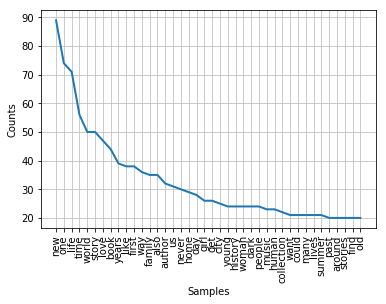

In [17]:
freq = nltk.FreqDist(description_clean.words)
freq.plot(40, cumulative = False)